<a href="https://colab.research.google.com/github/DSW-47/COVID-Dashboard-php/blob/main/centigradosAFahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias
import tensorflow as tf #libreria para IA hecha por google
import numpy as np #Para trabajar facilmente con arreglos numericos


In [ ]:
 #arreglos para entrenamiento 
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float) #entrada
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float) #resultados

In [ ]:
#Se diseña el modelo de red neuronal con keras que permite hacer RNA de manera simple ahorrando código

#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1=tf.keras.layers.Dense(units=3, input_shape=[1]) #Input shape permite ahorrars el tener que declarar la entrada como las otras capas
oculta2=tf.keras.layers.Dense(units=3)
salida=tf.keras.layers.Dense(units=1)
modelo=tf.keras.Sequential([oculta1, oculta2, salida]) #El modelo es para definir las capas y que pueda trabajar

In [ ]:
#Definir valores para el aprendizaje
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),#tasa de Aprendizaje
    loss='mean_squared_error' #Significa que una poca cantidad de errores grandes es peor que una gran cantidad de errores pequeños
) 

In [ ]:
#Función de Entrenamiento
print("Comenzando entrenamiento...")
historial=modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) #se indican los datos de entrada, resultados esperados, repeticiones a dar, imprimir
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


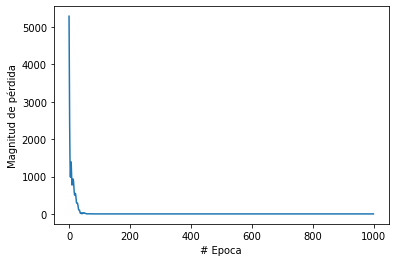

In [ ]:
#Gráficar errores
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Hagamos una predicción!")
resultado=modelo.predict([55.0]) #Indicarle valor a intentar predecir
print("El resultado es "+str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[131.00002]] fahrenheit!


In [ ]:
#Imprime los pesos y los sesgos
print ("Variables internas del modelo")
#print (capa.get_weights())
print (oculta1.get_weights())
print (oculta2.get_weights())
print (salida.get_weights())

Variables internas del modelo
[array([[ 0.1897755 ,  0.15173188, -0.88010967]], dtype=float32), array([-2.6444013,  3.465944 , -3.7112222], dtype=float32)]
[array([[ 0.37575272,  1.4415804 , -0.02203508],
       [-0.3715147 , -0.7025674 , -1.5800536 ],
       [ 0.675355  ,  0.84149176,  0.9299444 ]], dtype=float32), array([-1.9915296, -4.1017823, -4.061031 ], dtype=float32)]
[array([[-0.19275416],
       [-1.0099744 ],
       [-1.0438429 ]], dtype=float32), array([3.589709], dtype=float32)]
